# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [33]:
# plt 中文字体
import matplotlib as mpl
import matplotlib.pyplot as plt

CHINESE_FONT = 'Microsoft YaHei'   # 或者改成 'SimHei'

# ① 把它加入默认的 sans‑serif 字体族
mpl.rcParams['font.sans-serif'] = [CHINESE_FONT]   # 只改 sans-serif 系列
mpl.rcParams['font.family']      = 'sans-serif'    # 统一使用 sans-serif

# ② 关闭负号的 Unicode 处理（负号会显示成方框）
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
raw_data = pd.read_csv('./../../课件/07数据分析篇/titanic_train.csv')
clean_data = raw_data.copy()

In [3]:
raw_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age, Cabin, Embarked 缺失
- 类型: 
  - ID -> str
  - Survied, Pclass, Sex, Embarked -> category

In [7]:
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
clean_data['PassengerId'] = clean_data['PassengerId'].astype('str')

clean_data['Survived'] = clean_data['Survived'].astype('category')
clean_data['Pclass'] = clean_data['Pclass'].astype('category')
clean_data['Sex'] = clean_data['Sex'].astype('category')
clean_data['Embarked'] = clean_data['Embarked'].astype('category')

In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [ ]:
len(clean_data[clean_data['Age'].isna()]) / len(raw_data)


0.19865319865319866

占比过大, 用均值填充

In [15]:
avg_age = clean_data['Age'].mean()
clean_data['Age'] = clean_data['Age'].fillna(avg_age)
clean_data['Age'].isna().sum()

0

In [17]:
len(clean_data[clean_data['Cabin'].isna()]) / len(raw_data)

0.7710437710437711

In [16]:
clean_data[clean_data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [18]:
clean_data[clean_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


登船港口一般不影响生还

重复数据: 其他可以重复, id不能重复

In [19]:
clean_data['PassengerId'].duplicated().sum()

0

不一致数据

In [24]:
category_lst = ['Survived', 'Pclass', 'Sex', 'Embarked']

for i in category_lst:
    print(i,'\n' , clean_data[i].value_counts())

Survived 
 0    549
1    342
Name: Survived, dtype: int64
Pclass 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex 
 male      577
female    314
Name: Sex, dtype: int64
Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


无效/错误数据

In [25]:
clean_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## 整理数据

伴侣和孩子的数量(同行人)会理论上会影响家庭成员的生还, 因此新增一例数据

In [27]:
clean_data['FamilyNum'] = clean_data['SibSp'] + clean_data['Parch']

## 探索数据

In [ ]:
sns.set_palette('pastel')

### 存活率

([<matplotlib.patches.Wedge at 0x1871ee34490>,
 [Text(-0.3925749350994583, 1.0275626113924428, '死亡'),
  Text(0.3925750313068116, -1.0275625746369201, '存活')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

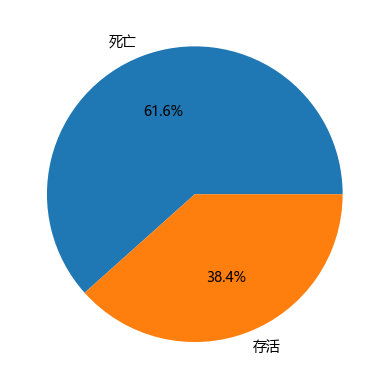

In [35]:
survived_count = clean_data['Survived'].value_counts()
survived_count.index = ['死亡', '存活']
plt.pie(survived_count, labels=survived_count.index, autopct='%.1f%%')

### 年龄

<Axes: >

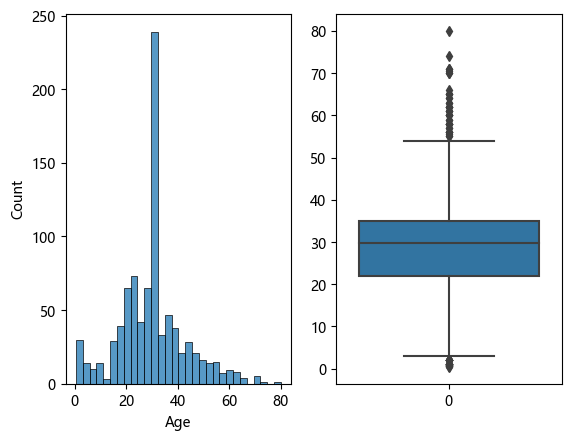

In [39]:
_, axes = plt.subplots(1, 2)
sns.histplot(clean_data['Age'], ax=axes[0])
sns.boxplot(clean_data['Age'], ax=axes[1])

大多数乘客年龄位于20岁到40岁之间，但有不少老年乘客以及婴儿

### 年龄与幸存关系

<Axes: xlabel='Age', ylabel='Count'>

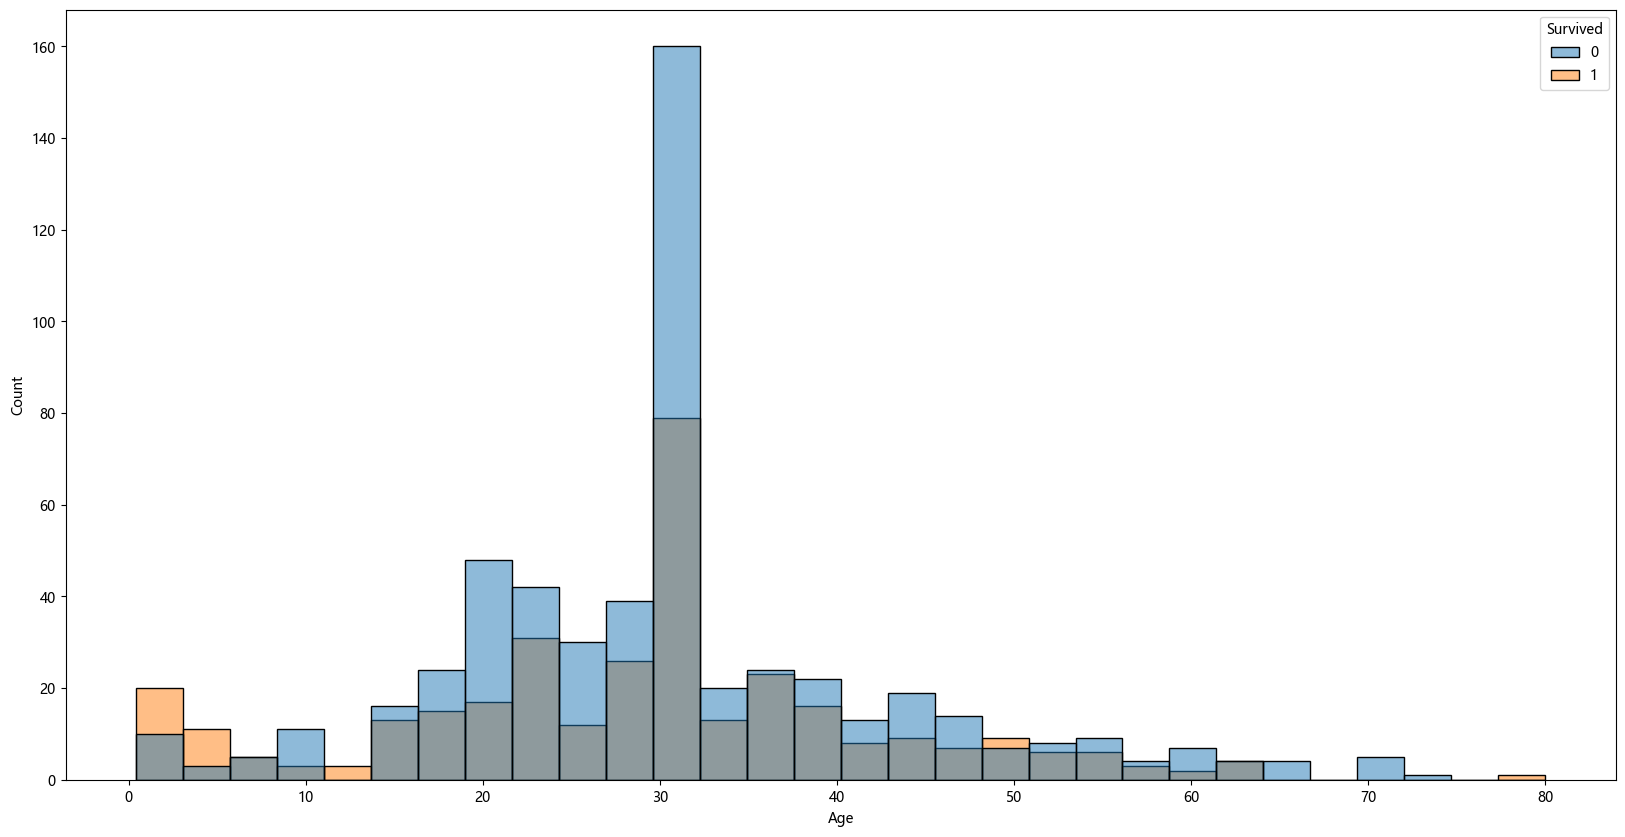

In [56]:
plt.figure(figsize=(20, 10))  
sns.histplot(clean_data, x='Age', hue='Survived')

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。

### 彩票金额

<Axes: ylabel='Fare'>

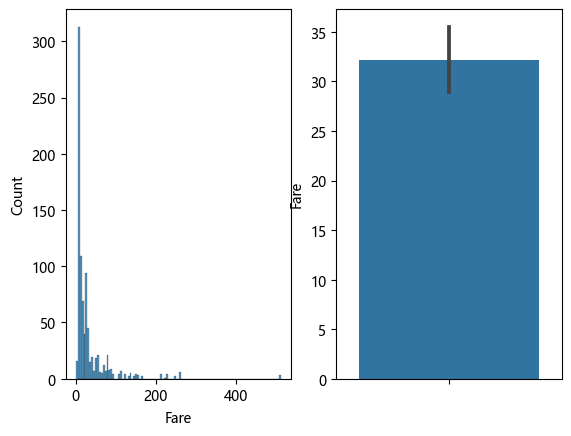

In [43]:
_, axes = plt.subplots(1, 2)
sns.histplot(clean_data, x='Fare', ax=axes[0])
sns.barplot(clean_data, y='Fare', ax=axes[1])

<Axes: xlabel='Fare', ylabel='Count'>

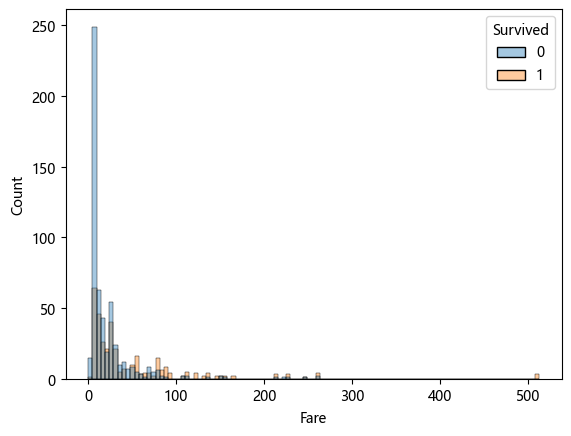

In [51]:
sns.histplot(clean_data, x='Fare', hue='Survived', alpha=0.4)

### 船等级与幸存

<Axes: xlabel='Pclass', ylabel='count'>

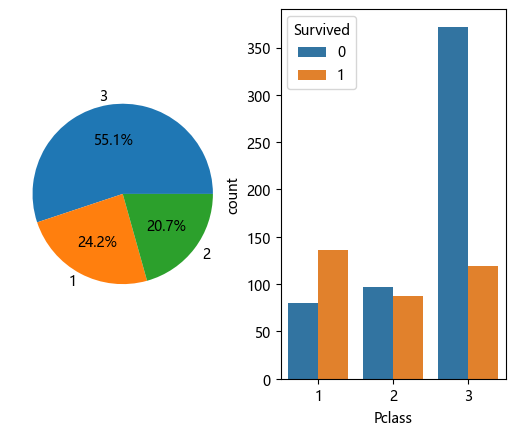

In [46]:
figure, axes = plt.subplots(1, 2)
pclass_count = clean_data['Pclass'].value_counts()
axes[0].pie(pclass_count, labels=pclass_count.index, autopct='%.1f%%')
sns.countplot(clean_data, x="Pclass", hue='Survived', ax=axes[1])

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大。

### 性别与是否幸存的关系

<Axes: xlabel='Survived', ylabel='count'>

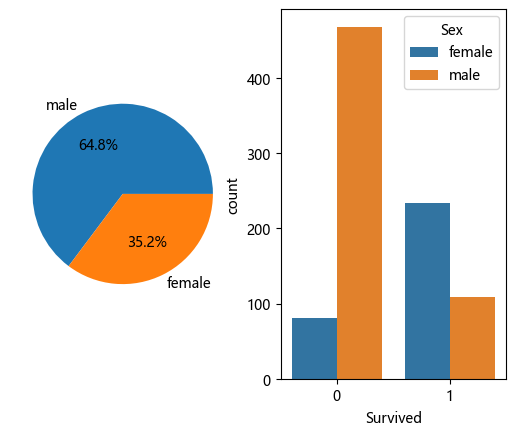

In [59]:
figure, axes = plt.subplots(1, 2)
Sex_count = clean_data['Sex'].value_counts()
axes[0].pie(Sex_count, labels=Sex_count.index, autopct='%.1f%%')
sns.countplot(clean_data, x="Survived", hue='Sex', ax=axes[1])

从是否幸存与性别之间的柱状图来看，男性乘客中遇难比例更大，女性乘客中幸存比例更大。

### 登船港口与是否幸存的关系

<Axes: xlabel='Embarked', ylabel='count'>

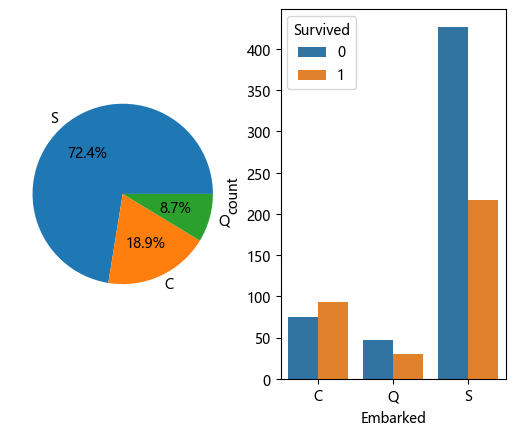

In [62]:
figure, axes = plt.subplots(1, 2)
Embarked_count = clean_data['Embarked'].value_counts()
axes[0].pie(Embarked_count, labels=Embarked_count.index, autopct='%.1f%%')
sns.countplot(clean_data, x="Embarked", hue='Survived', ax=axes[1])

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反。

### 家庭成员数量与是否幸存的关系

<Axes: xlabel='FamilyNum', ylabel='count'>

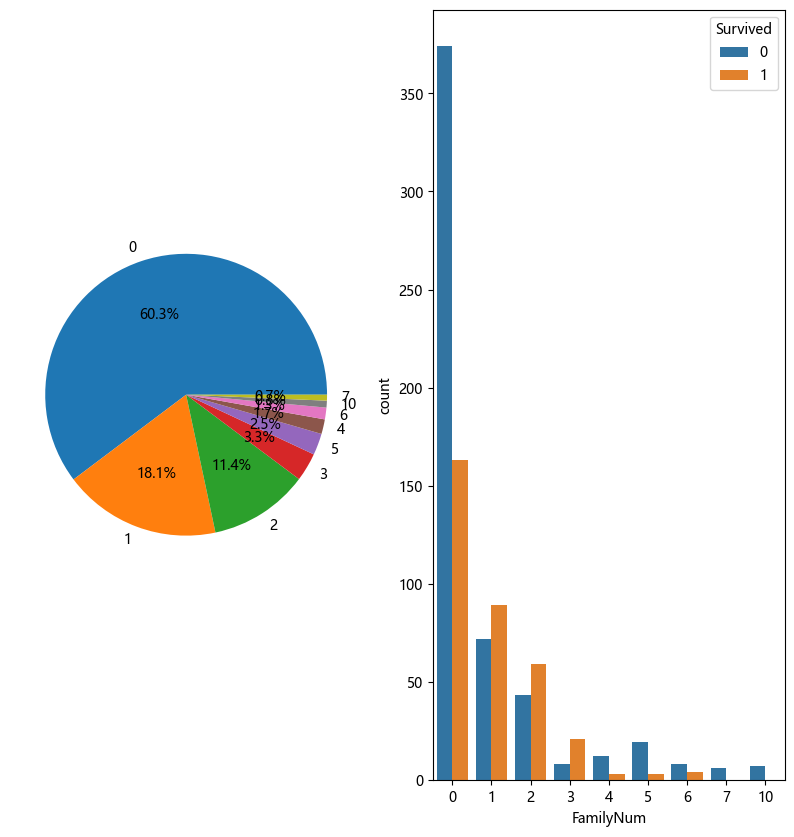

In [65]:
figure, axes = plt.subplots(1, 2, figsize=[10,10])
FamilyNum_count = clean_data['FamilyNum'].value_counts()
axes[0].pie(FamilyNum_count, labels=FamilyNum_count.index, autopct='%.1f%%')
sns.countplot(clean_data, x="FamilyNum", hue='Survived', ax=axes[1])

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1～3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

In [37]:
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


## 分析数据: 逻辑回归

In [ ]:
import statsmodels.api as sm

In [ ]:
logistic_r = clean_data.copy()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


移除['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
logistic_r = logistic_r.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

分类 -> 虚拟

In [70]:
logistic_r = pd.get_dummies(logistic_r, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)

In [71]:
logistic_r 

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,1,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0
888,0,29.699118,1,2,23.4500,3,0,1,0
889,1,26.000000,0,0,30.0000,0,0,0,1


创建模型

In [83]:
y = logistic_r['Survived']

In [72]:
X = logistic_r.drop('Survived', axis=1)

相关性检验

In [77]:
(X.corr().abs() > 0.8).sum()
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


从以上输出来看，`SibSp`和`FamilyNum`之间的相关系数绝对值大于0.8。这符合预期，因为`FamilyNum`是根据`SibSp`和`Parch`计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除`FamilyNum`或`SibSp`。我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留`FamilyNum`。

此外，如果仔细看相关系数数值，会发现`Parch`和`FamilyNum`之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对`Parch`进行移除，避免算法无法收敛。

In [80]:
X = X.drop(['Parch', 'SibSp'], axis=1)
X

,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,22.000000,7.2500,1,0,1,1
1,38.000000,71.2833,1,0,0,0
2,26.000000,7.9250,0,0,1,0
3,35.000000,53.1000,1,0,0,0
4,35.000000,8.0500,0,0,1,1
...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,1
887,19.000000,30.0000,0,0,0,0
888,29.699118,23.4500,3,0,1,0
889,26.000000,30.0000,0,0,0,1


In [81]:
X = sm.add_constant(X)

In [85]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                  0.3339
Time:                        13:58:37   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

$\alpha = 0.05$  
P of Fare > 0.05: 相关性过强,应该移除

In [ ]:
X = X.drop('Fare', axis=1)

In [90]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                  0.3323
Time:                        14:01:34   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

## 预测

In [96]:
predict_data = pd.read_csv('./../../课件/07数据分析篇/titanic_test.csv')

In [99]:
predict_data['Age'] = predict_data['Age'].fillna(predict_data['Age'].mean())
predict_data['Age'].isna().sum()

0

转换种类, 添加种类

In [100]:
predict_data['Pclass'] = pd.Categorical(predict_data['Pclass'], categories=['1', '2', '3'])
predict_data['Sex'] = pd.Categorical(predict_data['Sex'], categories=['female', 'male'])
predict_data['Embarked'] = pd.Categorical(predict_data['Embarked'], categories=['C', 'Q', 'S'])

In [101]:
predict_data = pd.get_dummies(predict_data, drop_first=True, dtype=int, columns=['Pclass', 'Sex'])
predict_data

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,C,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,S,0,0,1


### 根据模型的params 关系预测数据集

In [103]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

In [106]:
predict_data['FamilyNum'] = predict_data['Parch'] + predict_data['SibSp']

In [113]:
predict_data = predict_data[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]

In [114]:
X_test = sm.add_constant(predict_data)
X_test

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.50000,0,0,0,1
1,1.0,47.00000,1,0,0,0
2,1.0,62.00000,0,0,0,1
3,1.0,27.00000,0,0,0,1
4,1.0,22.00000,2,0,0,0
...,...,...,...,...,...,...
413,1.0,30.27259,0,0,0,1
414,1.0,39.00000,0,0,0,0
415,1.0,38.50000,0,0,0,1
416,1.0,30.27259,0,0,0,1


### 预测   
输出生存的概率

In [ ]:
predicted = model.predict(X_test)
predicted 

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

In [120]:
(predicted > 0.5).sum() / len(predicted)

0.7559808612440191